**Using Decision Tree**

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

### Performing data preprocessing and cleaning

In [135]:
df=pd.read_csv("day - day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


`cnt` is dropped from X cause that is what we want to predict, registered and casual is also dropped because the sum of both will lead to `cnt` which leads to data leakage. Now X only has features

Y has what we want to predict

In [136]:
X=df.drop(["cnt","dteday","registered","casual"],axis=1)
Y=df["cnt"]

Dataset is split to training and testing dataset to train the model better

In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)

**Decision Tree Regression** splits data into rules and `max_depth` is given as 5 so as to avoid overfitting ie tree depth is limitted to 5 levels

In [138]:
dt=DecisionTreeRegressor(random_state=0,max_depth=5)
dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

`Y_pred` will store all predictions the model makes for X_test 

In [139]:
Y_pred=dt.predict(X_test)

R²-Scores how well line explains the variation in data.Ranges between 0 to 1.

MAE-Mean Absolute Error is the avergae of absolute difference between predicted and actual values

RMSE-Root Mean Sqaured Error is the square root of the average squared differences between predicted and actual values. Larger errors have more impact

In [140]:
print("R²:",r2_score(Y_test,Y_pred))
print("MAE:",mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))

R²: 0.8024639337588669
MAE: 683.5740303378977
RMSE: 935.8274437872456


### Visualization

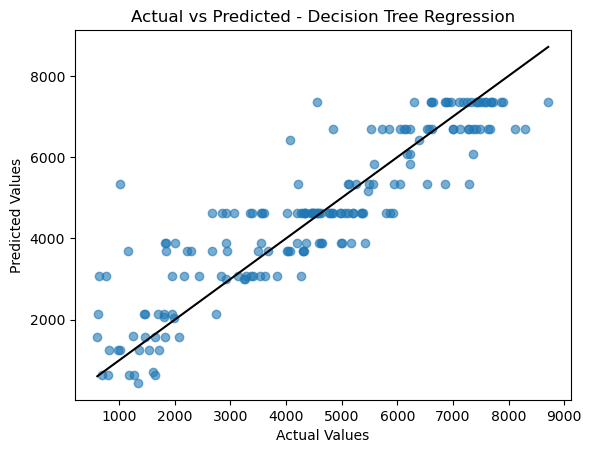

In [141]:
plt.scatter(Y_test, Y_pred, alpha=0.6) 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Decision Tree Regression")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="black")  # Reference line
plt.show()

In [142]:
X_casual=df.drop(["cnt","registered","casual","dteday"],axis=1)
Y_casual=df["casual"]

In [143]:
X_registered=df.drop(["cnt","casual","registered","dteday"],axis=1)
Y_registered=df["registered"]

Dataset is split to training and testing dataset to train the model better

In [144]:
X_train_casual,X_test_casual,Y_train_casual,Y_test_casual=train_test_split(X_casual,Y_casual,random_state=0)

In [145]:
X_train_reg,X_test_reg,Y_train_reg,Y_test_reg=train_test_split(X_registered,Y_registered,random_state=0)

**Decision Tree Regression** is applied to both the casual and registered users

In [146]:
dt_casual=DecisionTreeRegressor(random_state=0,max_depth=5)
dt_casual.fit(X_train_casual,Y_train_casual)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [147]:
dt_registered=DecisionTreeRegressor(random_state=0,max_depth=5)
dt_registered.fit(X_train_reg,Y_train_reg)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [148]:
Y_pred_casual=dt_casual.predict(X_test_casual)
Y_pred_reg=dt_registered.predict(X_test_reg)

In [149]:
print("R²:", r2_score(Y_test_casual,Y_pred_casual))
print("MAE:", mean_absolute_error(Y_test_casual,Y_pred_casual))
print("RMSE:", np.sqrt(mean_squared_error(Y_test_casual,Y_pred_casual)))

print("R²:", r2_score(Y_test_reg,Y_pred_reg))
print("MAE:", mean_absolute_error(Y_test_reg,Y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(Y_test_reg,Y_pred_reg)))

R²: 0.7354863437518626
MAE: 235.50553809278398
RMSE: 375.28648807810197
R²: 0.7635641548590204
MAE: 575.2373579593591
RMSE: 816.1492707257078


Adding and checking how accurate the predictions are for `cnt`

In [150]:
cnt_pred=Y_pred_casual+Y_pred_reg

print("Total R²:", r2_score(Y_test,cnt_pred))
print("Total MAE:", mean_absolute_error(Y_test,cnt_pred))
print("Total RMSE:", np.sqrt(mean_squared_error(Y_test,cnt_pred)))

Total R²: 0.7956071879602671
Total MAE: 694.7402080528375
Total RMSE: 951.9308156959494
